In [1]:
import os.path as pth
import fastoad.api as oad
from fastuav.utils.postprocessing.sensitivity_analysis.sensitivity_analysis import doe_fast

DATA_FOLDER_PATH = "../data"
CONFIGURATIONS_FOLDER_PATH = "../configurations"
WORK_FOLDER_PATH = "./workdir"

CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "multirotor_mdo_lca.yaml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "problem_outputs_lca_mdo.xml")

oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="multirotor_mdo_lca.yaml"
)

oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)
INPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_inputs.xml")
oad.variable_viewer(INPUT_FILE)

D:\Softwares\Miniconda3\envs\FAST-UAV\lib\site-packages\openmdao\core\system.py:3631: OpenMDAOWarning:Calling `list_inputs` before `final_setup` will only display the default values of variables and will not show the result of any `set_val` calls.


In [4]:
x_dict = {
    "data:weight:arms:density": [1500, 2500, None],
    "data:structures:arms:stress:max": [70000000/2, 70000000*2, None]
         }
y_list = ["data:weight:mtow", "mission:operational:energy"]
n_samples = 10
df = doe_fast("uniform", x_dict, y_list, CONFIGURATION_FILE, n_samples)

In [5]:
df

,data:weight:arms:density,data:structures:arms:stress:max,data:weight:mtow,mission:operational:energy
0,1669.292455,4.880764e+07,6.823588,1361.970037
1,2324.728358,5.619867e+07,7.231425,1445.202113
2,2403.551251,1.127041e+08,6.592158,1316.159060
3,2396.003132,1.302590e+08,6.496306,1297.389332
4,2063.158072,5.786398e+07,6.972620,1392.104107
5,1871.192204,1.002841e+08,6.434319,1285.337974
6,2274.611584,5.787921e+07,7.147237,1427.823170
7,1637.983014,7.608174e+07,6.477047,1293.636686
8,1805.603313,6.290802e+07,6.706841,1338.832993
9,1839.793827,6.092233e+07,6.755813,1348.378374


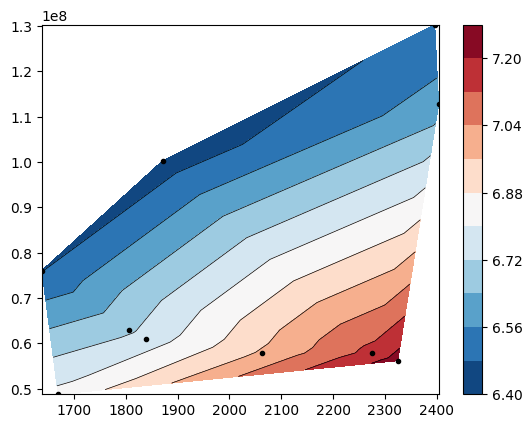

In [15]:
import matplotlib.pyplot as plt

def plot_contour(df, x_name, y_name, z_name, levels: int = None):
    """
    Contour plot from dataframe values.
    """
    # Get data
    x = df[x_name]
    y = df[y_name]
    z = df[z_name]
    
    # Initialize plot
    fig, ax = plt.subplots()

    # Plot contour
    ax.tricontour(x, y, z, levels=levels, linewidths=0.5, colors='k')
    cntr = ax.tricontourf(x, y, z, levels=levels, cmap="RdBu_r")
    fig.colorbar(cntr, ax=ax)
    
    # Data points
    ax.plot(x, y, 'ko', ms=3)
    
    return fig

x_name = list(x_dict.keys())[0]
y_name = list(x_dict.keys())[1]
z_name = y_list[0]

fig = plot_contour(df, x_name, y_name, z_name, levels=10)